### Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline

In [2]:
#adding a random line to check git

### Data Preparation

In [2]:
data = pd.read_csv('Wine.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1].values

#Preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

#Train Test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Applying PCA on the Dataset 

In [3]:
def PCA_transform(X_train, X_test):
    
    from sklearn.decomposition import PCA
    from matplotlib.ticker import Formatter, FixedLocator
    plt.style.use('seaborn')
    
    
    #Fitting PCA on the Dataset
    n_comp = X_train.shape[1]
    pca = PCA(n_components = n_comp)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    explained_variance = pca.explained_variance_ratio_
    explained_variance = np.insert(explained_variance,0,0).cumsum()
    
    while len(explained_variance) != n_comp+1:
         explained_variance = np.insert(explained_variance,-1,1)
            
    # Plotting the graph 
    fig, axes = plt.subplots(figsize = (16,10))
    axes.plot(range(n_comp+1), 1 - explained_variance)
    axes.set_title("PCA Scree Plot")
    axes.set_xlabel("Number of Components")
    axes.set_ylabel("% Variance not Explained")

    axes.title.set_fontsize(15)
    axes.xaxis.label.set_fontsize(13)
    axes.yaxis.label.set_fontsize(13)
    
    axes.yaxis.set_major_locator(FixedLocator(np.linspace(0, 1, num = 11)))
    axes.xaxis.set_major_locator(FixedLocator(np.linspace(0, n_comp, n_comp+1)))
    
    return X_train, X_test


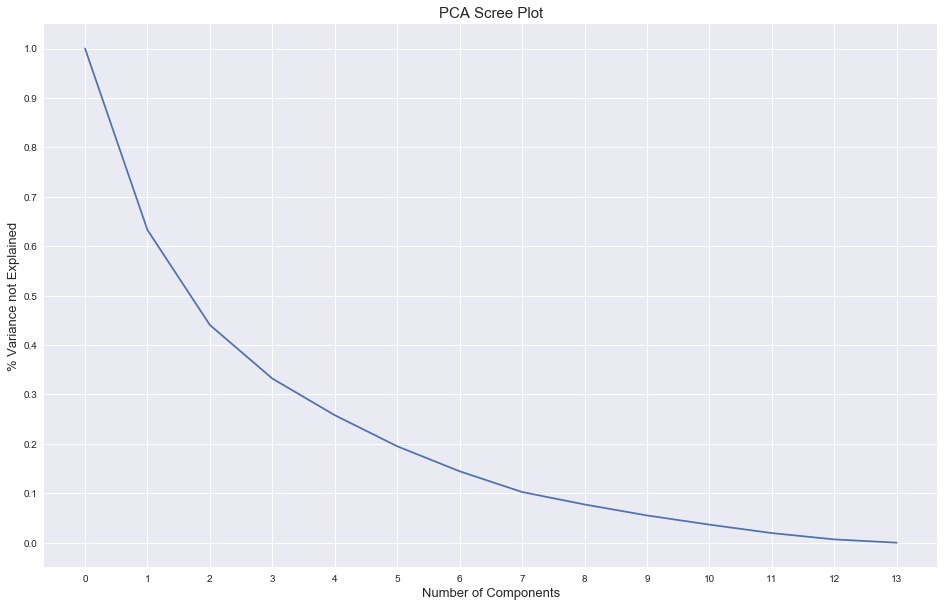

In [33]:
X_train, X_test = PCA_transform(X_train, X_test)

In [30]:
def LDA_transform(X_train, X_test):
    
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    from matplotlib.ticker import Formatter, FixedLocator
    plt.style.use('seaborn')
    
    n_comp = X_train.shape[1]
    lda = LDA(n_components = n_comp, store_covariance=True)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    
    explained_variance = lda.explained_variance_ratio_
    explained_variance = np.insert(explained_variance,0,0).cumsum()
    
    while len(explained_variance) != n_comp+1:
         explained_variance = np.insert(explained_variance,-1,1)
        
    
    # Plotting the graph 
    fig, axes = plt.subplots(figsize = (16,10))
    axes.plot(range(n_comp+1), 1 - explained_variance)
    axes.set_title("LDA Scree Plot")
    axes.set_xlabel("Number of Components")
    axes.set_ylabel("% Variance Not Explained")

    axes.title.set_fontsize(15)
    axes.xaxis.label.set_fontsize(13)
    axes.yaxis.label.set_fontsize(13)
    
    axes.yaxis.set_major_locator(FixedLocator(np.linspace(0, 1, num = 11)))
    axes.xaxis.set_major_locator(FixedLocator(np.linspace(0, n_comp, n_comp+1)))
    
    return X_train, X_test

    

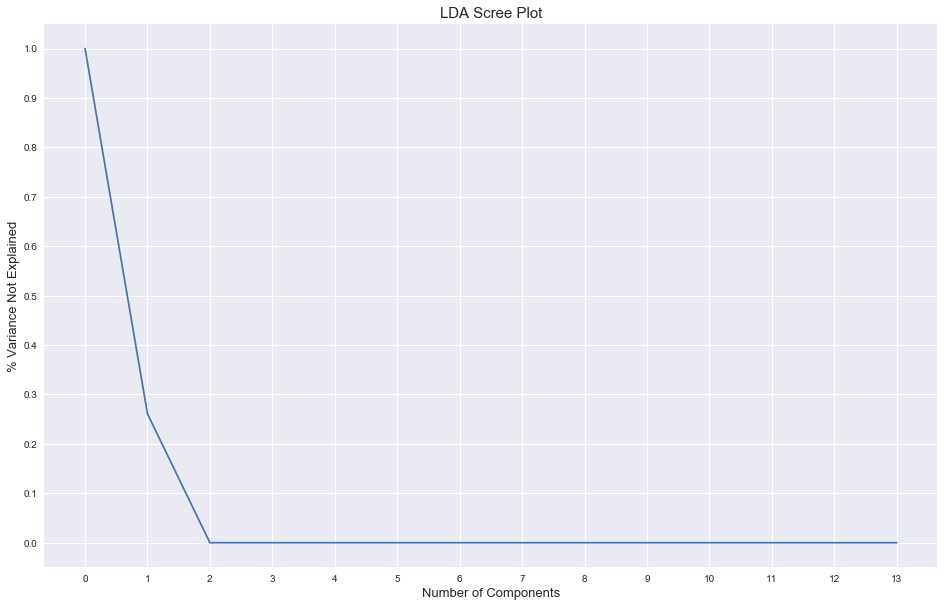

In [31]:
LDA_transform(X_train, X_test);

### Kernel PCA

In [34]:
def transform_Kernel_PCA(X_train, X_test, n_comp):
    from sklearn.decomposition import KernelPCA
    kpca = KernelPCA(n_components = n_comp, kernel = 'rbf')
    X_train = kpca.fit_transform(X_train)
    X_test = kpca.transform(X_test)
    
    return X_train, X_test

array([[ 0.85156946,  0.82912808,  0.63414004, ...,  0.01119018,
        -1.11821035, -0.21302116],
       [-0.38369551, -0.72382916, -0.38935541, ...,  0.01119018,
        -0.77922407, -0.8021525 ],
       [-1.70542902, -0.31090412, -0.3162486 , ...,  0.88865792,
         0.49197446, -1.27982657],
       ...,
       [-0.71721705, -0.65201611, -0.64522928, ...,  0.44992405,
         0.49197446, -1.27982657],
       [ 1.1109751 , -0.58917969, -0.90110314, ..., -0.20817676,
         1.01457831,  0.75824943],
       [ 1.43214399,  0.15588072,  0.41481959, ..., -1.48050498,
        -1.27357906, -0.27671104]])

##### trying 2 different models

In [24]:
from sklearn import decomposition, pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [27]:
pca = decomposition.PCA()
svd = decomposition.TruncatedSVD()
svm = SVC()
n_components = [4, 5, 7]

In [72]:
pipe = pipeline.Pipeline(steps=[('reduction', pca), ('svm', svm)])

In [76]:
params_grid = [
    {
'svm__C': [1, 10, 100, 1000],
'svm__kernel': ['linear', 'rbf'],
'svm__gamma': [0.001, 0.0001],
'reduction':[pca],
'reduction__n_components': n_components,
},
{
'svm__C': [1, 10, 100, 1000],
'svm__kernel': ['linear', 'rbf'],
'svm__gamma': [0.001, 0.0001],
'reduction':[svd],
'reduction__n_components': n_components,
'reduction__algorithm':['randomized']
}
    
]

In [77]:
grd = GridSearchCV(pipe, param_grid = params_grid)

In [78]:
grd.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('reduction', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'svm__C': [1, 10, 100, 1000], 'svm__kernel': ['linear', 'rbf'], 'svm__gamma': [0.001, 0.0001], 'reduction': [PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)], 'reduction__n_components': [4, 5, 7]}, {'svm__C': [1, 10, 1...tate=None, tol=0.0)], 'reduction__n_components': [4, 5, 7], 'reduction__algorithm': ['randomized']}],
       pre_dispatch='2*n_jobs', refit=True, return

In [79]:
grd.predict(X_test)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [80]:
from sklearn.metrics import classification_report

In [81]:
grd.best_params_

{'reduction': PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 'reduction__n_components': 4,
 'svm__C': 100,
 'svm__gamma': 0.001,
 'svm__kernel': 'rbf'}

In [82]:
print(classification_report(y_test, grd.predict(X_test)))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00         6

   micro avg       0.94      0.94      0.94        36
   macro avg       0.96      0.96      0.96        36
weighted avg       0.95      0.94      0.94        36

